<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DataAnalysis_0_UnivariateBivariateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Analysis

**What is Univariate Analysis?**
- **Definition**: Univariate analysis involves the examination of the distribution of a single variable. The term "univariate" signifies that it involves only one variable.
- **Purpose**: It aims to describe and summarize the main characteristics of the variable without looking at relationships between variables.
- **Methods**: Common methods include calculating summary statistics (mean, median, mode, range, variance, standard deviation), and visualizations like histograms, boxplots, and pie charts.

**What does it do?**
- **Distribution Assessment**: It helps in understanding the distribution of the variable (e.g., whether it is normally distributed, skewed, or has outliers).
- **Central Tendency and Dispersion**: Provides measures of central tendency (mean, median, mode) and dispersion (range, variance, standard deviation).
- **Identifying Outliers**: Visualizations like boxplots are effective in identifying outliers.
- **Data Cleaning**: Highlights issues such as missing values and anomalies that need to be addressed before further analysis.

**Relationship to Machine Learning**:
- **Feature Understanding**: It aids in understanding the behavior of individual features, which is crucial for feature engineering.
- **Data Preprocessing**: Helps in detecting and handling missing values, outliers, and deciding on transformations or scaling techniques.
- **Initial Insight**: Provides initial insights and helps in forming hypotheses about the data, which can guide the choice of machine learning models.

###Visualizations

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the dataset
data = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = data.frame

# Identifying numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['category']).columns

# Convert 'education-num' to 'category' data type
df['education-num'] = df['education-num'].astype('category')

# print("Numerical features:", numerical_features)
# print("Categorical features:", categorical_features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  category
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(10), int64(5)
memory usage: 2.3 MB


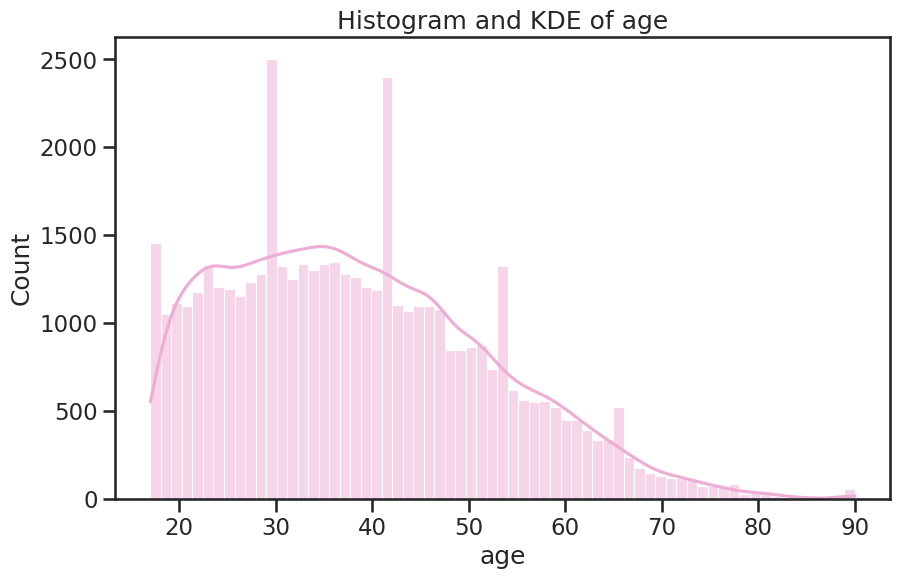

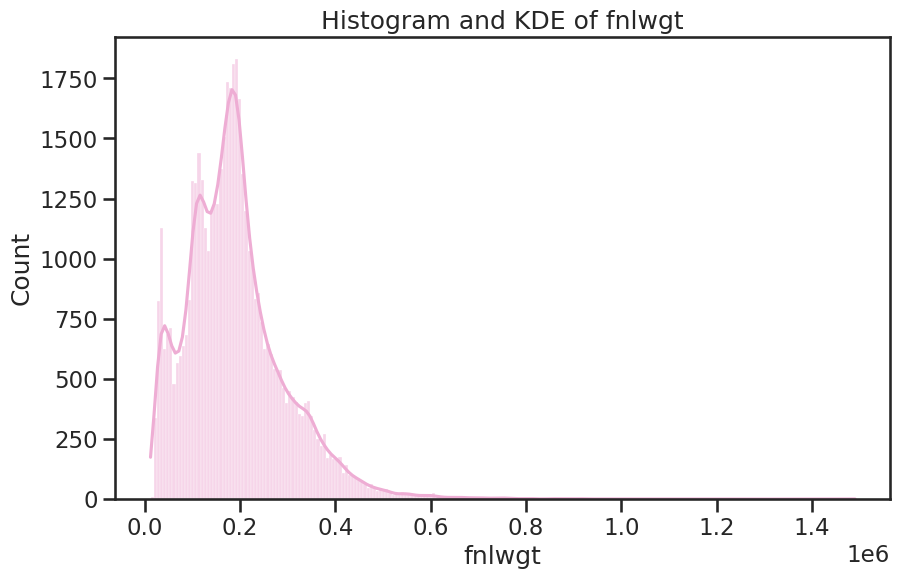

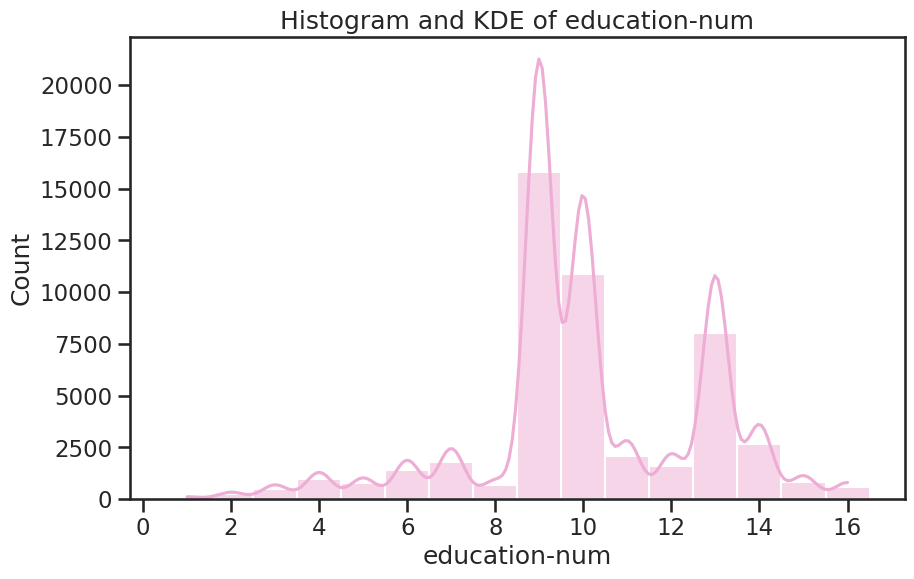

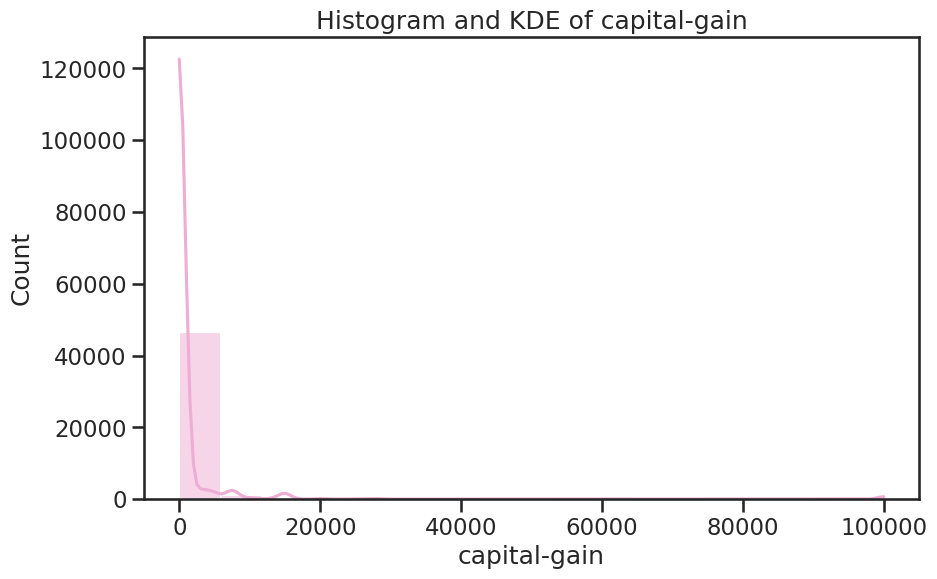

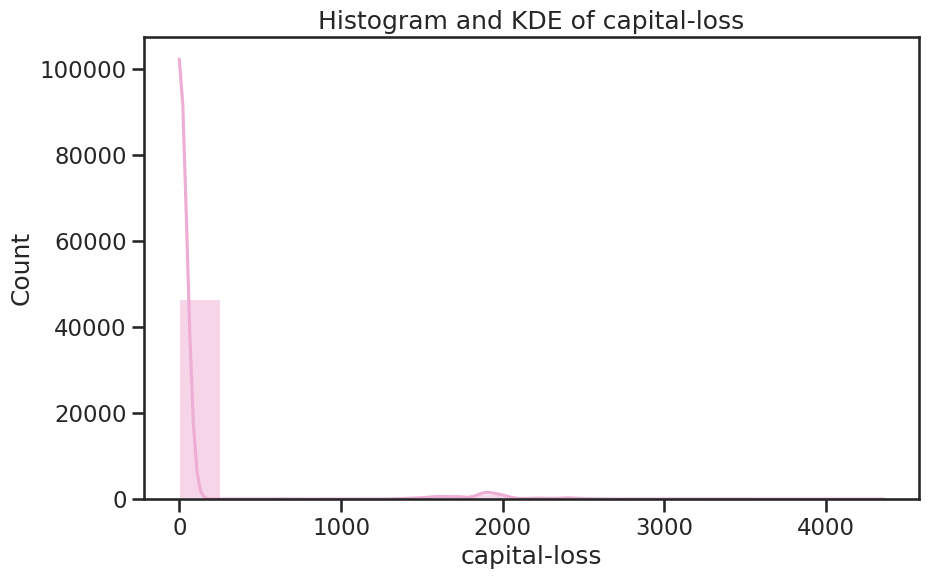

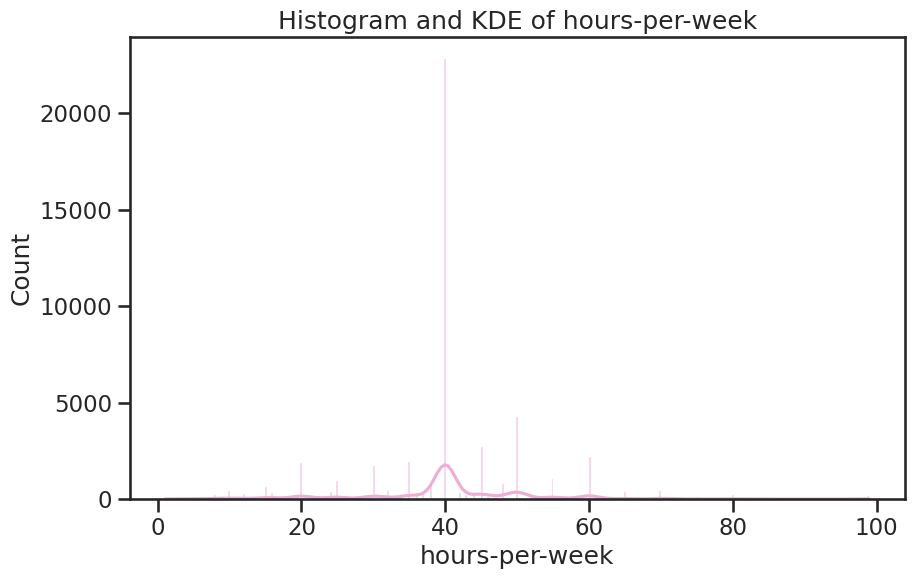

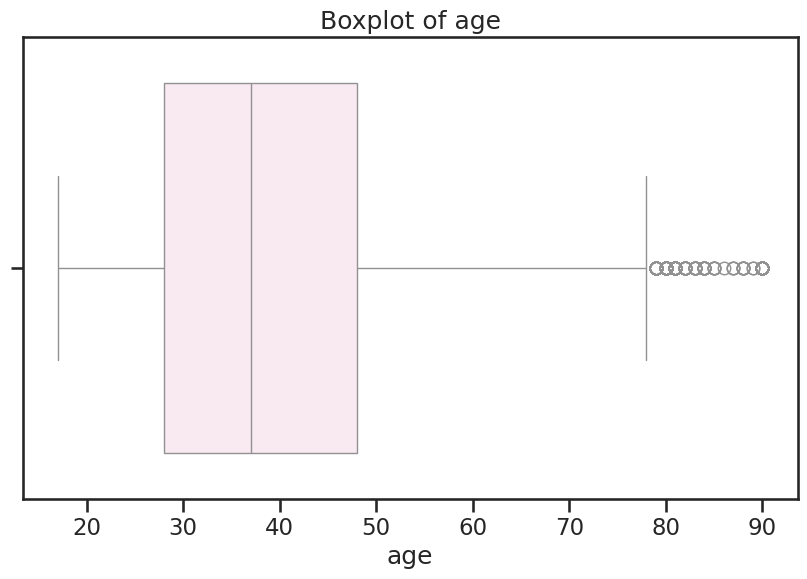

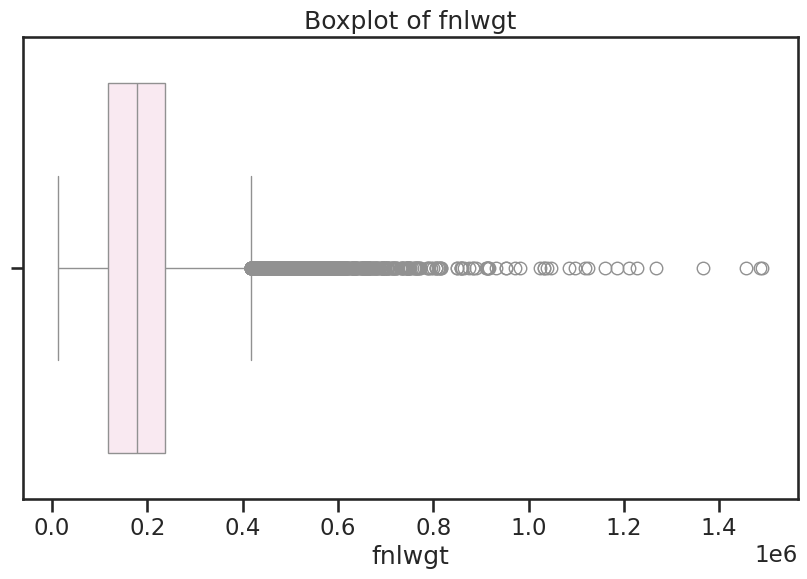

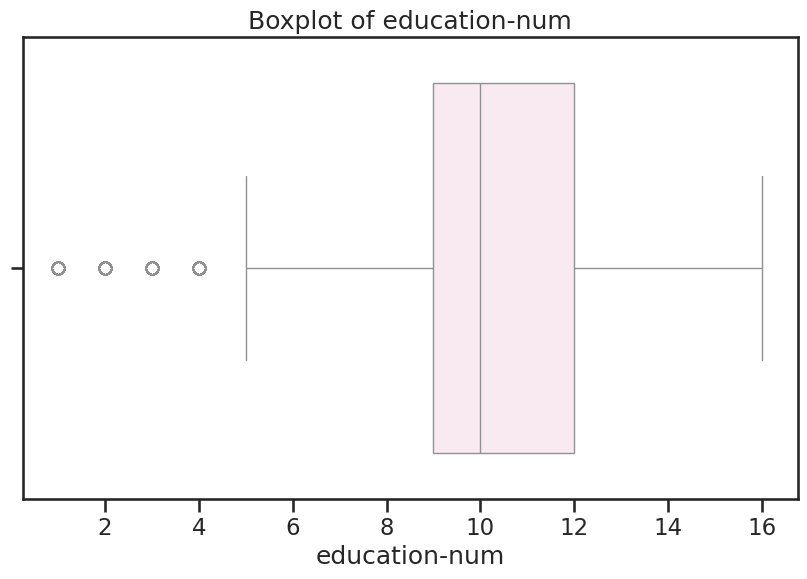

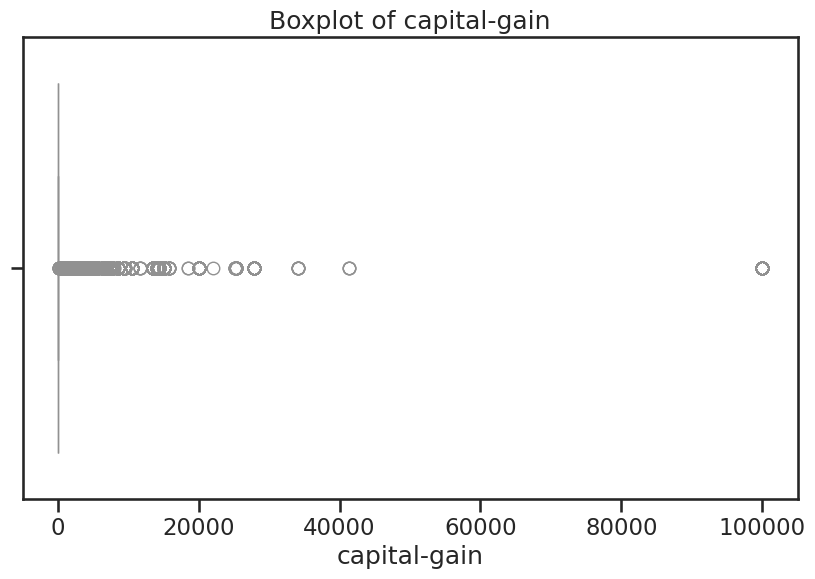

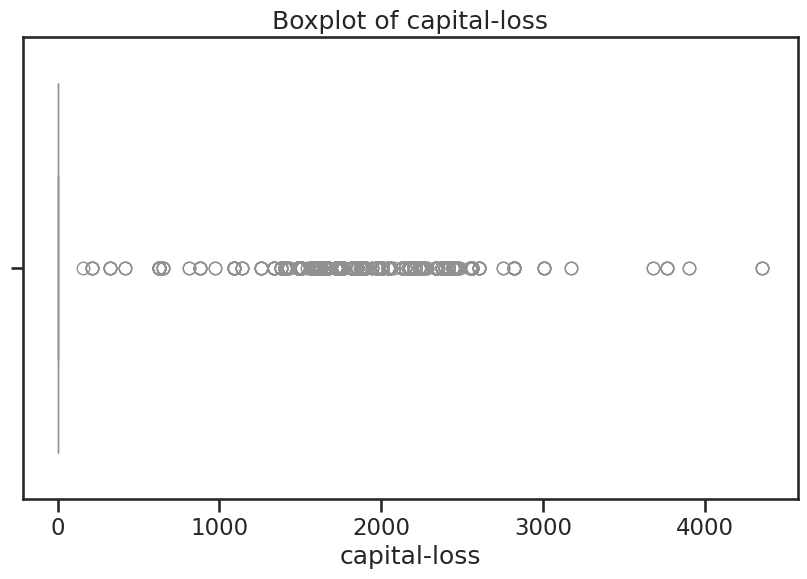

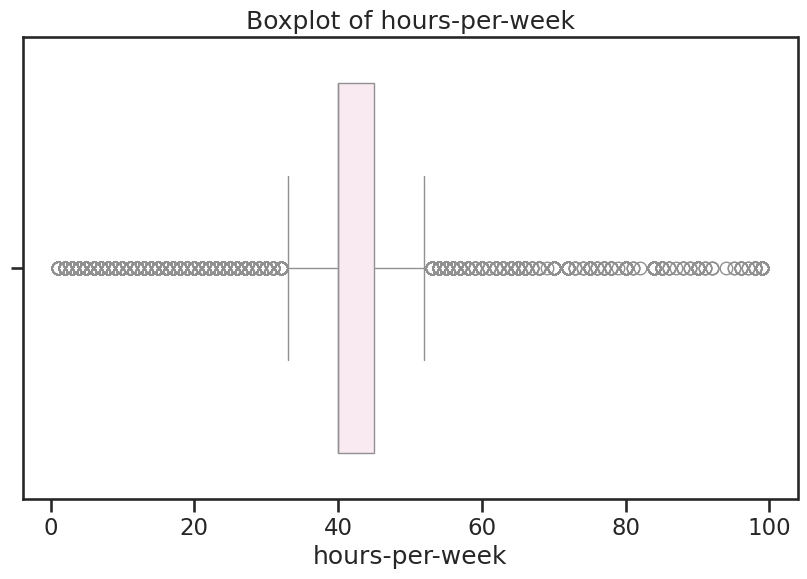

In [3]:
# Set the context, style, and palette for the plots
context = 'talk'
style = 'ticks'
palette_name = 'PiYG'
sns.set_context(context)
sns.set_style(style)
palette = sns.color_palette(palette_name)

# Univariate Analysis for Numerical Features

# Histograms and KDE plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, color=palette[1])
    plt.title(f'Histogram and KDE of {feature}')
    plt.show()

# Boxplots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], color=palette[2])
    plt.title(f'Boxplot of {feature}')
    plt.show()

### Univariate Analysis Key Points

**Univariate Analysis** involves examining the distribution of a single variable to summarize and understand its main characteristics. This foundational step is crucial for data preprocessing and initial insights.

**Key Points**:

- **Distribution Shape**:
  - **Normal Distribution**: Symmetrical, bell-shaped curve indicating data is evenly distributed around the mean. Common in many natural phenomena and useful for parametric statistical tests.
  - **Skewed Distribution**: Asymmetrical distribution where data tends to cluster towards one end (left or right skew). Skewness affects the mean and median and can indicate the need for data transformation.
  - **Bimodal/Multimodal Distribution**: Distributions with two or more peaks. Indicates the presence of multiple subgroups within the data.

- **Categorical Analysis**:
  - **Frequency Tables**: Summarize the count of each category, providing a quick overview of the data distribution.
  - **Proportions**: Show the relative frequency of categories, useful for comparing distributions across different groups or time periods.

- **Data Transformation**:
  - **Log Transformation**: Reduces right skewness, making data more normally distributed and stabilizing variance.
  - **Square Root Transformation**: Similar to log transformation but used for data with zero or small positive values.
  - **Box-Cox Transformation**: A family of power transformations that can make data more normal, suitable for various types of skewed distributions.

- **Missing Values**:
  - **Detection**: Identify missing data using methods like `df.isnull().sum()`.
  - **Imputation**: Fill missing values using mean, median, mode, or advanced techniques like KNN or multiple imputation.
  - **Removal**: If a variable has too many missing values or if they are not critical, removing them might be more practical.

**Visualization Tools**:
- **Histograms**: Show the frequency distribution of numerical data, providing insights into the shape and spread.
- **Boxplots**: Visualize the distribution, central tendency, and outliers. Useful for comparing distributions across different groups.
- **Pie Charts**: Represent categorical data as slices of a pie, showing proportions visually.
- **Frequency Tables**: Summarize the count of each category in a categorical variable, offering a straightforward overview.




## Bivariate Analysis

**What is Bivariate Analysis?**
- **Definition**: Bivariate analysis involves the examination of the relationship between two variables. The term "bivariate" signifies that it involves two variables.
- **Purpose**: It aims to determine the strength, direction, and nature of the relationship between the two variables.
- **Methods**: Common methods include calculating correlation coefficients (Pearson, Spearman), and visualizations like scatter plots, box plots, and heatmaps.

**What does it do?**
- **Relationship Assessment**: Helps in understanding whether and how two variables are related (e.g., linear relationship, correlation).
- **Strength and Direction**: Measures the strength and direction of the relationship (positive, negative, or no correlation).
- **Dependency**: Helps in identifying dependencies between variables, which is crucial for understanding causality and making predictions.
- **Interaction**: Explores interactions between variables that can be important in multivariate analysis and model building.

**Relationship to Machine Learning**:
- **Feature Selection**: Helps in identifying which features are strongly related to the target variable and to each other, guiding feature selection.
- **Model Selection**: Insights from bivariate analysis can influence the choice of machine learning algorithms (e.g., linear regression for linear relationships).
- **Feature Engineering**: Identifies interactions between variables that might be used to create new features.
- **Data Preprocessing**: Highlights multicollinearity issues where two or more features are highly correlated, which can affect model performance.

### Relationship Between Univariate and Bivariate Analysis in Machine Learning

**Complementary Roles**:
- **Univariate Analysis**: Provides a foundational understanding of individual variables, ensuring that each variable is well-understood and appropriately processed.
- **Bivariate Analysis**: Builds on univariate analysis by examining relationships between pairs of variables, offering insights into interactions and dependencies.

**Sequential Process**:
1. **Start with Univariate Analysis**: Begin with univariate analysis to clean and preprocess each variable, ensuring they are ready for further analysis.
2. **Move to Bivariate Analysis**: Follow up with bivariate analysis to understand relationships between variables, guiding feature selection and engineering.

**Foundation for Multivariate Analysis**:
- Both univariate and bivariate analyses are stepping stones to multivariate analysis, where multiple variables are analyzed simultaneously to understand complex interactions and build predictive models.

In summary, univariate and bivariate analyses are essential steps in the data exploration process, providing critical insights that inform the preprocessing, feature selection, and modeling stages of machine learning.

###Visualizations

<ipython-input-9-a0ca32338ab2>:9: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


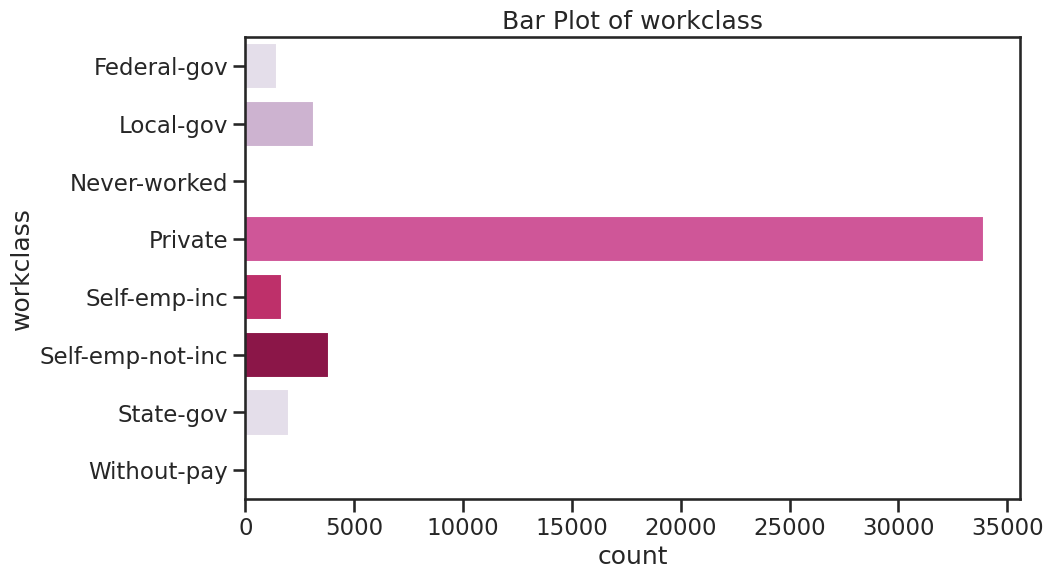

<ipython-input-9-a0ca32338ab2>:9: UserWarning: 
The palette list has fewer values (6) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


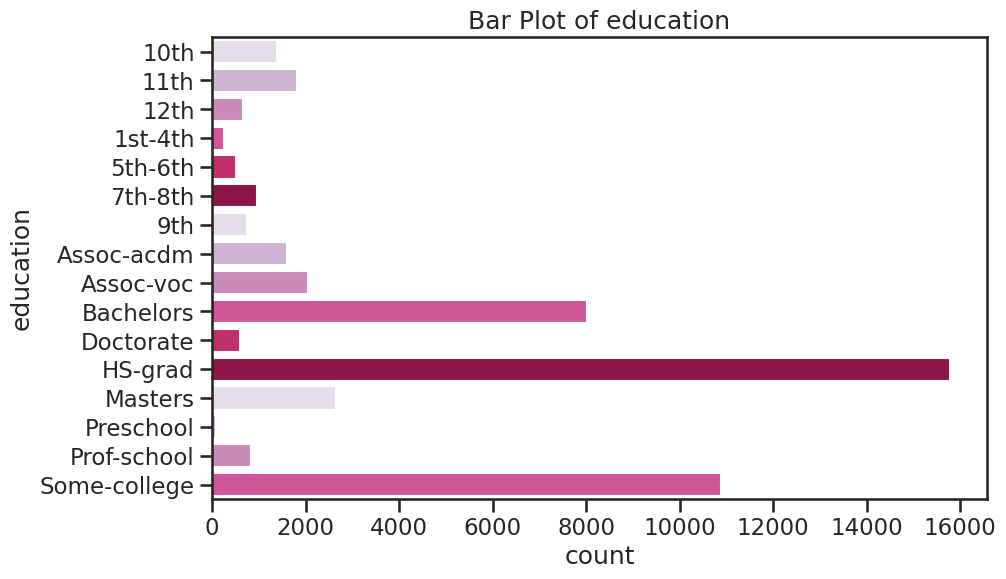

<ipython-input-9-a0ca32338ab2>:9: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


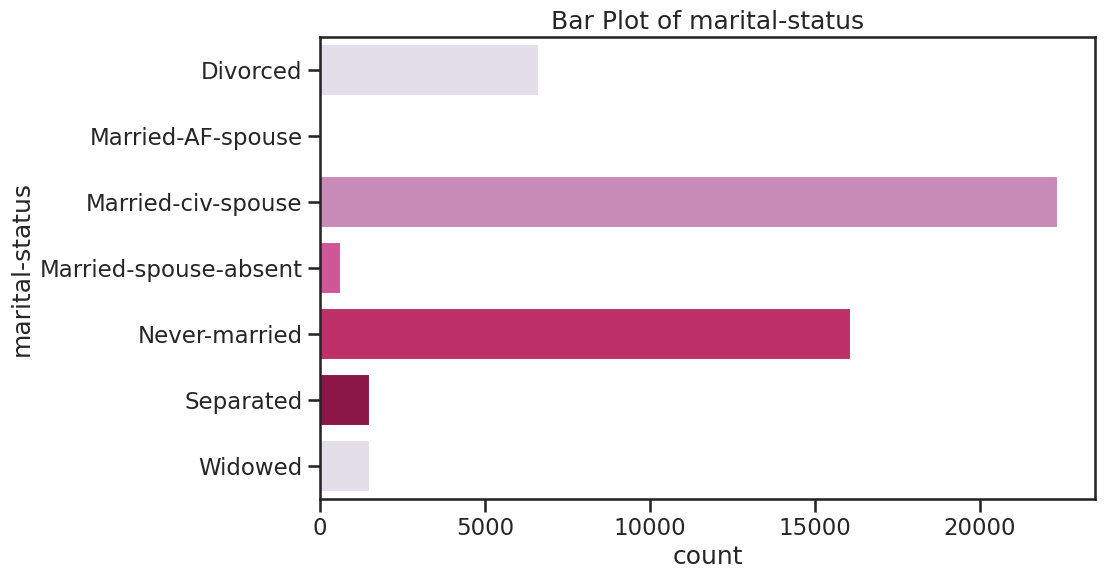

<ipython-input-9-a0ca32338ab2>:9: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


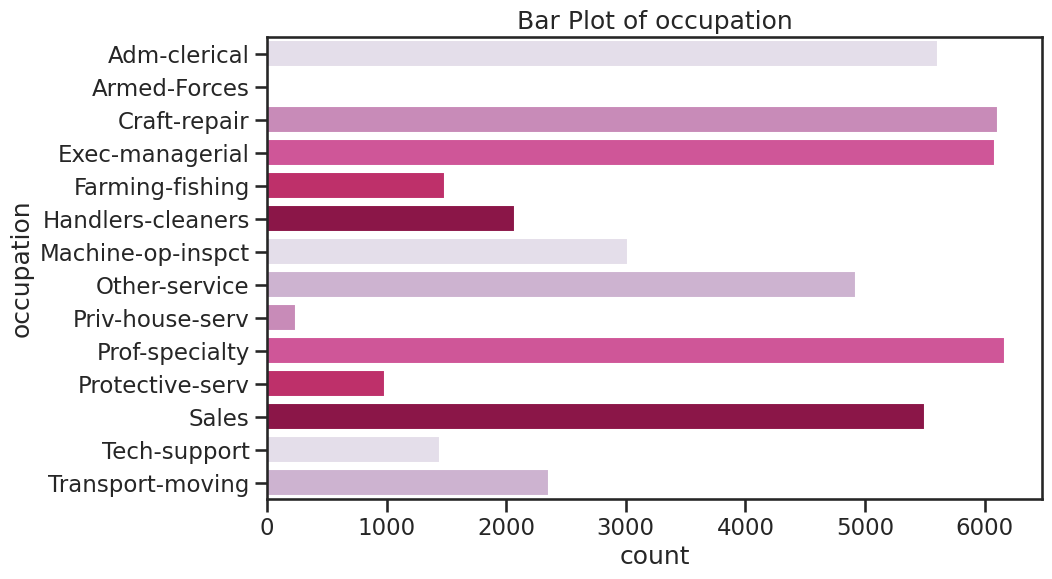

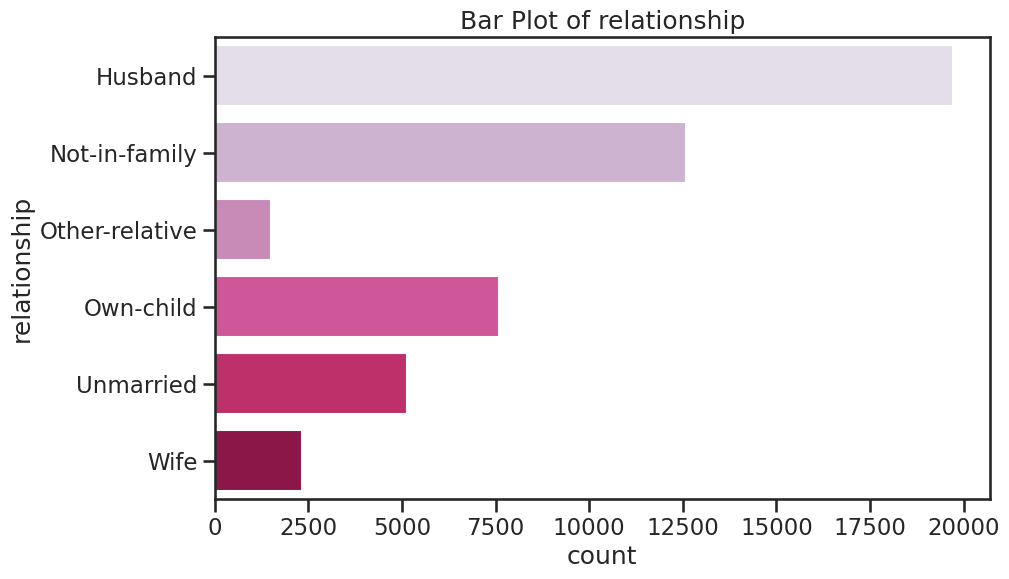

<ipython-input-9-a0ca32338ab2>:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


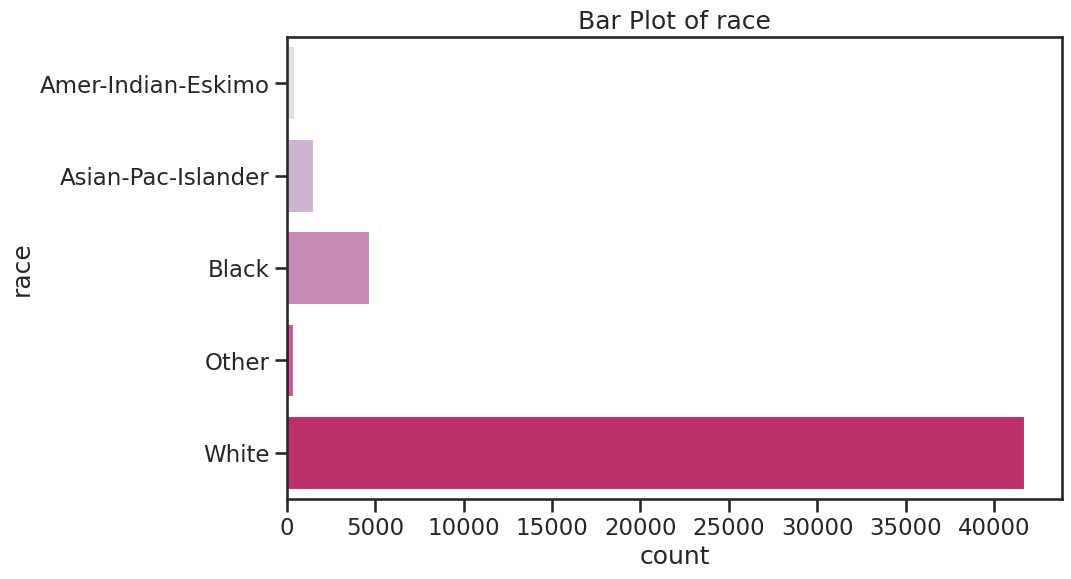

<ipython-input-9-a0ca32338ab2>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


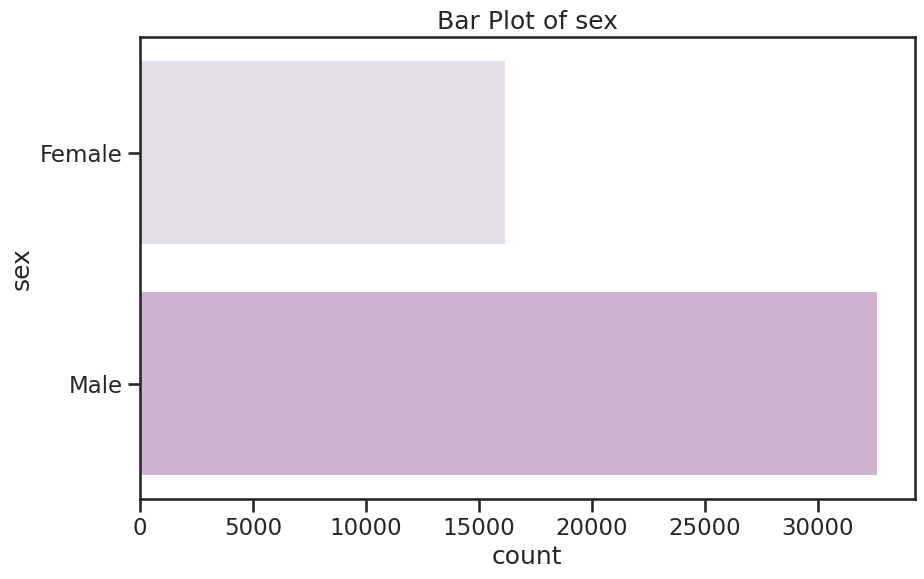

<ipython-input-9-a0ca32338ab2>:9: UserWarning: 
The palette list has fewer values (6) than needed (41) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


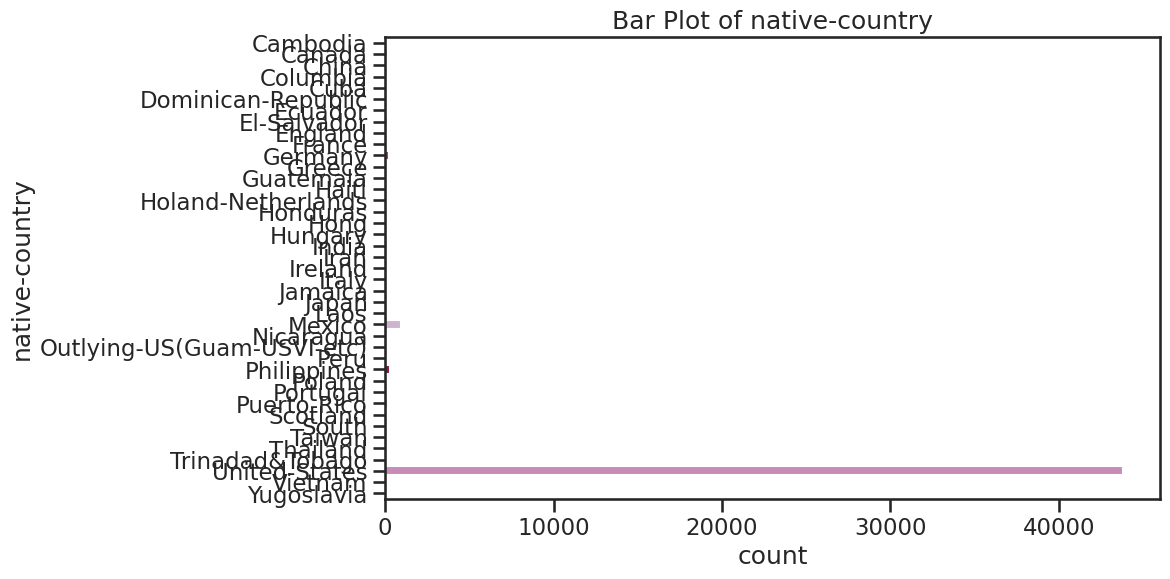

<ipython-input-9-a0ca32338ab2>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)


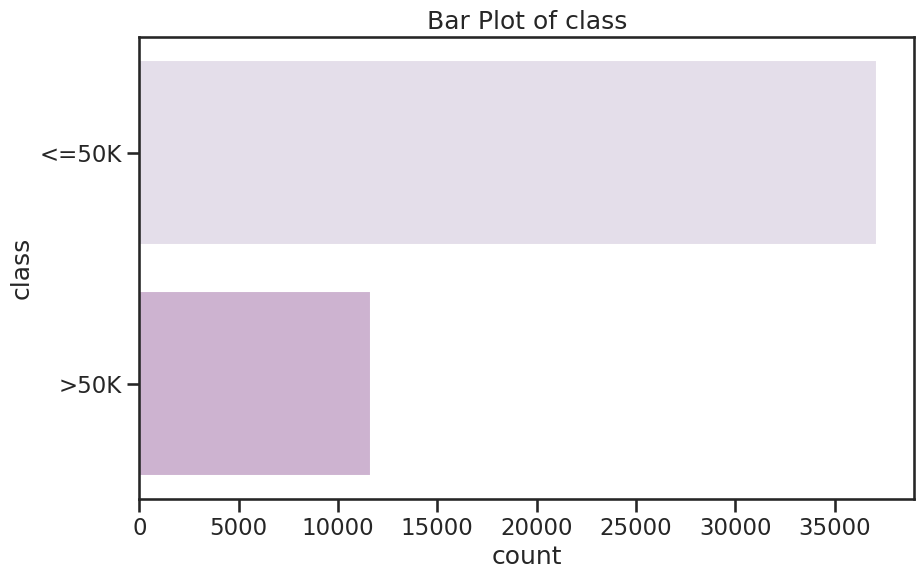

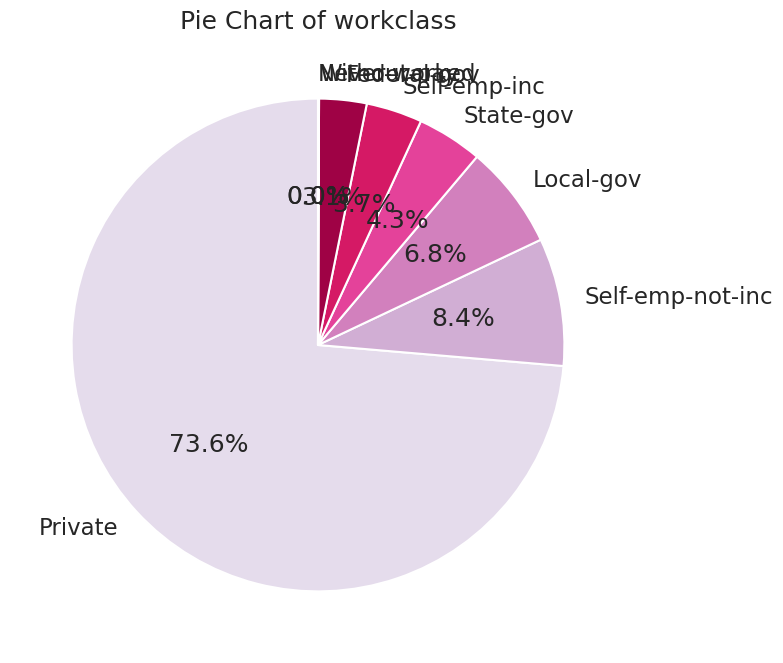

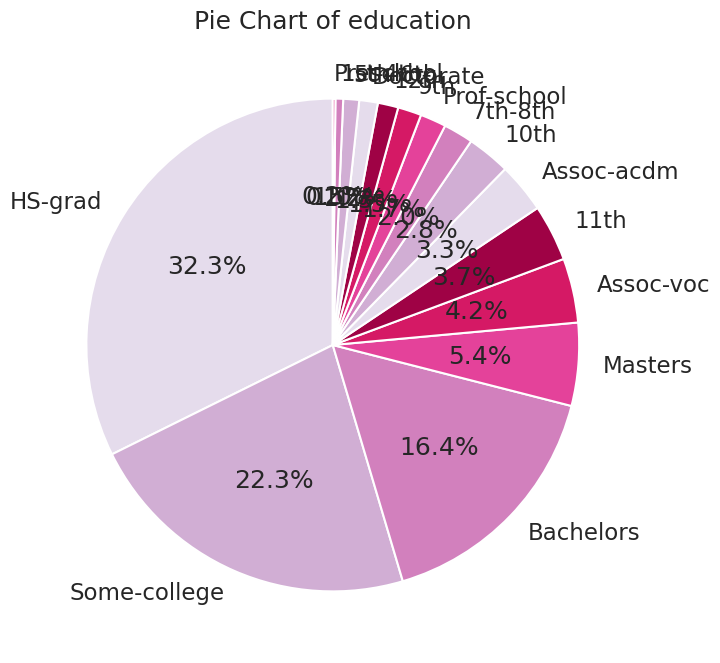

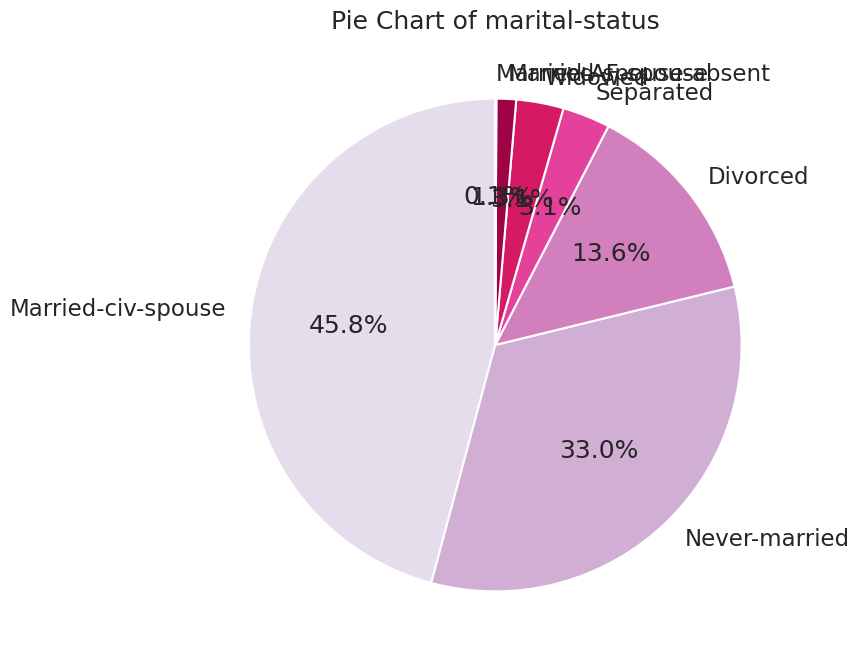

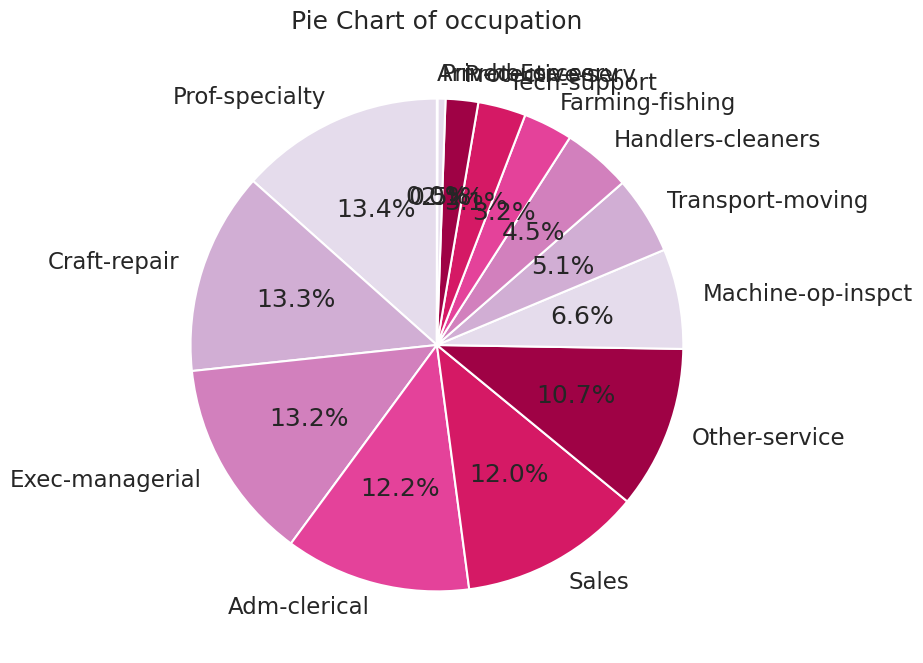

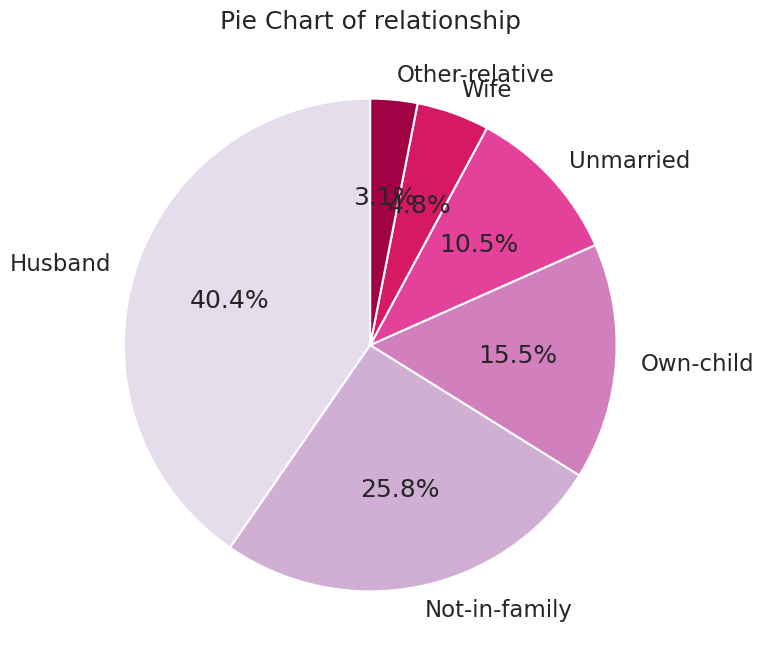

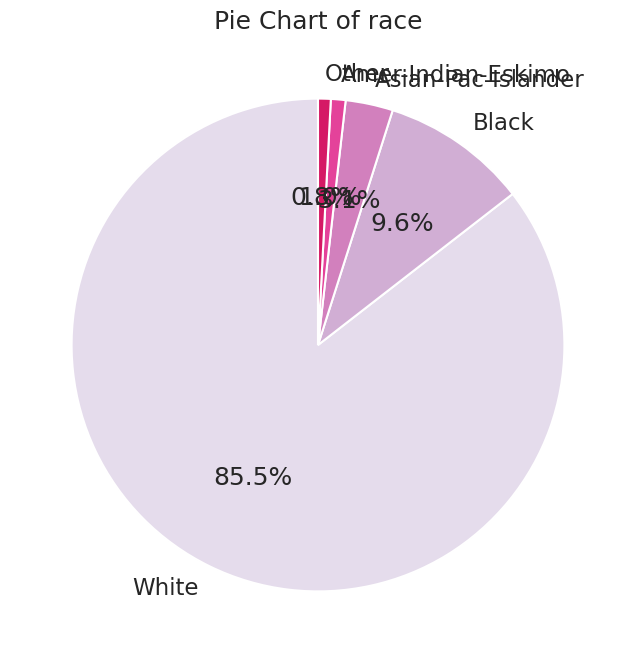

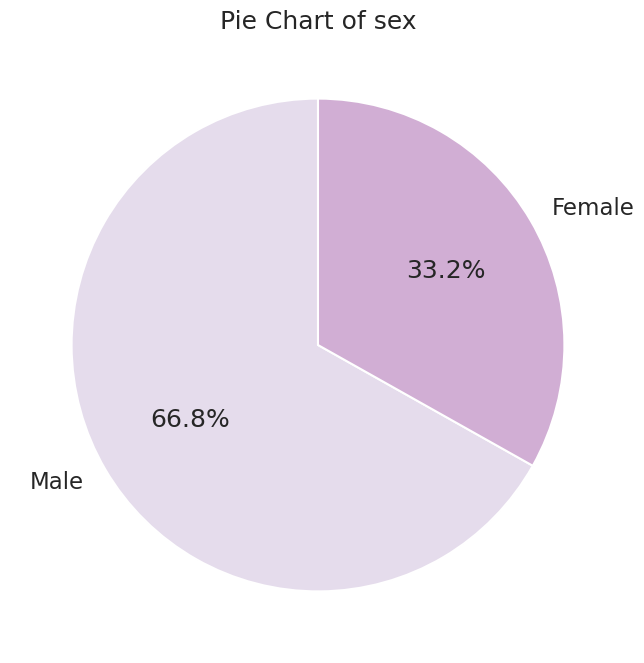

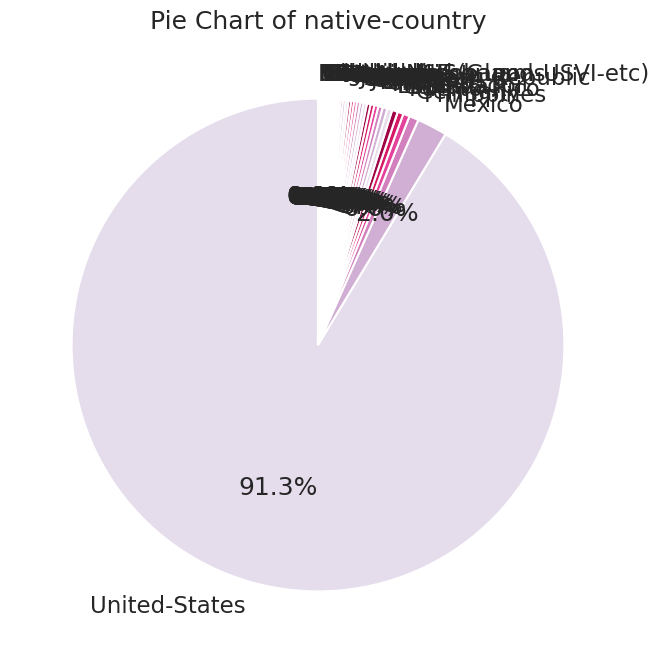

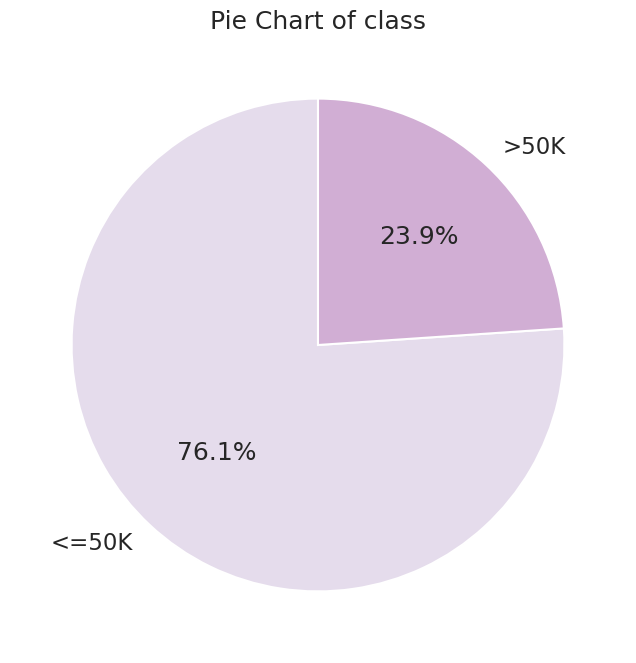

In [9]:
# Univariate Analysis for Categorical Features

palette_name = 'PuRd'
palette = sns.color_palette(palette_name)

# Bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], palette=palette, hue=df[feature], legend=False)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

# Pie charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', colors=palette, startangle=90)
    plt.title(f'Pie Chart of {feature}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

### Bivariate Analysis Key Points

**Bivariate Analysis** examines the relationship between two variables to understand their interaction, correlation, and potential causality. This step is essential for feature selection and understanding dependencies.

**Key Points**:

- **Types of Relationships**:
  - **Linear Relationship**: Direct proportionality between variables, where a change in one variable corresponds to a constant change in another. Identified using scatter plots and measured by correlation coefficients.
  - **Non-linear Relationship**: Variables are related in a more complex manner, such as quadratic or exponential relationships. Detected using scatter plots and non-linear regression models.
  - **Positive vs. Negative Correlation**: Positive correlation indicates that as one variable increases, the other does too. Negative correlation means that as one variable increases, the other decreases.

- **Correlation Coefficients**:
  - **Pearson Correlation**: Measures linear correlation between continuous variables, ranging from -1 to 1.
  - **Spearman Correlation**: Measures rank-order correlation, useful for ordinal data or non-linear relationships.
  - **Chi-Square Test**: Assesses the association between categorical variables, indicating whether observed frequencies deviate from expected frequencies.

- **Interaction Effects**:
  - **Definition**: Interaction occurs when the effect of one variable depends on the level of another variable.
  - **Identification**: Visualized using interaction plots or statistical tests. Important in regression models where interaction terms can be included.
  - **Implications**: Understanding interactions helps in feature engineering and improving model performance by capturing complex relationships.

**Visualization Tools**:
- **Scatter Plots**: Show relationships between two numerical variables, revealing trends, clusters, and outliers.
- **Heatmaps**: Visualize correlation matrices, indicating the strength and direction of relationships between multiple variables.
- **Boxplots**: Compare the distribution of a numerical variable across different levels of a categorical variable.
- **Pair Plots**: Display pairwise relationships between multiple numerical variables, offering a comprehensive view of interactions.
- **Facet Grids**: Create multiple subplots based on categorical variables, allowing for detailed comparison across different groups.

### Practical Tips

**Univariate Analysis**:
- **Outlier Treatment**: Use domain knowledge to decide whether to remove, cap, or transform outliers. Outliers can significantly impact statistical analyses and machine learning models.
- **Normalization/Standardization**: Ensure features are on a similar scale to improve the performance of certain algorithms (e.g., k-NN, SVM, neural networks).

**Bivariate Analysis**:
- **Multicollinearity**: Check for high correlation between predictor variables using VIF (Variance Inflation Factor). Multicollinearity can distort the estimation of regression coefficients.
- **Interaction Terms**: Consider adding interaction terms in regression models if significant interactions are found. This can improve model accuracy by capturing the combined effect of variables.

